In [136]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))

import warnings
warnings.filterwarnings("ignore")

from pathlib import PurePath
from src.utils.utils import *

pdir = get_relative_project_dir('FinML', partial=False)
# for notebook references
sys.path.extend([pdir])
print(pdir)

data_dir = pdir / 'data'
data_raw_dir = data_dir / 'raw'
data_interim_dir = data_dir / 'interim'
data_processed_dir = data_dir / 'processed'

#file_name = 'IVE_dollarValue_resampled_1s'
file_name = 'IVE_tickbidask_clean'
file_ext = '.parq'

parq_file_name = file_name + file_ext
# Load from parquet
infp = PurePath(data_interim_dir / parq_file_name)

df = pd.read_parquet(infp)
df = df.resample('1T').sum().drop_duplicates().dropna()

cprint(df)


Python 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] on darwin
/Users/scottblunsden/Programs/FinML


-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                         price      bid      ask  size     v           dv
dates                                                                    
2019-02-22 15:58:00  1130.4301  1130.38  1130.48  3125  3125  353256.8862
2019-02-22 15:59:00  1017.3950  1017.37  1017.47  1559  1559  176238.3600
2019-02-22 16:00:00   113.0500   113.04   113.05  1147  1147  129668.3500
2019-02-22 16:10:00   113.0500   112.67   113.15     0     0       0.0000
2019-02-22 18:30:00   113.0500   112.57   113.59     0     0       0.0000
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 565466 entries, 2009-09-28 09:30:00 to 2019-02-22 18:30:00
Data columns (total 6 columns):
price    565466 non-null float64
bid      565466 non-null float64
ask      565466 non-null float64
size  

In [137]:
import src.features.bars as bar

bars = bar.Bars()

dbars = bars.dollar_bar_df(df, 'dv', 1_000_000).drop_duplicates().dropna()
cprint(dbars)

  0%|          | 0/565466 [00:00<?, ?it/s]

 24%|██▍       | 136828/565466 [00:00<00:00, 1368268.26it/s]

 52%|█████▏    | 293749/565466 [00:00<00:00, 1422930.81it/s]

 82%|████████▏ | 461495/565466 [00:00<00:00, 1490788.96it/s]

100%|██████████| 565466/565466 [00:00<00:00, 1582334.79it/s]

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price     bid     ask   size      v            dv
dates                                                                    
2019-02-22 15:33:00  677.6299  677.59  677.66   5335   5335  6.024895e+05
2019-02-22 15:39:00  225.6800  225.68  225.70  11850  11850  1.337154e+06
2019-02-22 15:52:00  451.5470  451.53  451.55   3546   3546  4.002687e+05
2019-02-22 15:55:00  564.6950  564.75  564.80   4800   4800  5.421880e+05
2019-02-22 15:56:00  904.2716  904.21  904.30  18239  18239  2.061718e+06
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49060 entries, 2009-09-28 09:46:00 to 2019-02-22 15:56:00
Data columns (total 6 columns):
price    49060 non-null float64
bid      49060 non-null float64
ask      49060 non-null float64
size     4

In [138]:
import src.features.labeller as lab

close = dbars.price.copy()
labeller = lab.Labeller()
dailyVol = labeller.getDailyVol(close).dropna()

print(dailyVol.to_frame().head())


                     dailyVol
dates                        
2009-09-29 10:02:00  0.136713
2009-09-29 10:21:00  1.633209
2009-09-29 10:47:00  1.410228
2009-09-29 11:32:00  1.230290
2009-09-29 12:00:00  1.119849


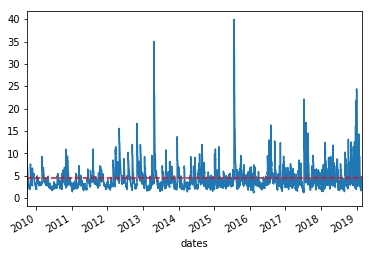

In [139]:
import matplotlib.pyplot as plt

f,ax=plt.subplots()
dailyVol.plot(ax=ax)
ax.axhline(dailyVol.mean(),ls='--',color='r')


In [140]:
tEvents = labeller.getTEvents(close,h=dailyVol.mean())
tEvents

  0%|          | 0/49058 [00:00<?, ?it/s]

  1%|          | 579/49058 [00:00<00:08, 5787.11it/s]

  2%|▏         | 1159/49058 [00:00<00:08, 5790.93it/s]

  4%|▎         | 1816/49058 [00:00<00:07, 6001.68it/s]

  5%|▌         | 2531/49058 [00:00<00:07, 6304.33it/s]

  7%|▋         | 3258/49058 [00:00<00:06, 6565.62it/s]

  8%|▊         | 4002/49058 [00:00<00:06, 6803.78it/s]

 10%|▉         | 4703/49058 [00:00<00:06, 6861.86it/s]

 11%|█         | 5468/49058 [00:00<00:06, 7079.56it/s]

 13%|█▎        | 6239/49058 [00:00<00:05, 7255.72it/s]

 14%|█▍        | 7005/49058 [00:01<00:05, 7371.12it/s]

 16%|█▌        | 7770/49058 [00:01<00:05, 7452.59it/s]

 17%|█▋        | 8507/49058 [00:01<00:05, 7427.46it/s]

 19%|█▉        | 9282/49058 [00:01<00:05, 7520.83it/s]

 21%|██        | 10057/49058 [00:01<00:05, 7587.07it/s]

 22%|██▏       | 10814/49058 [00:01<00:05, 7480.88it/s]

 24%|██▎       | 11562/49058 [00:01<00:05, 7478.77it/s]

 25%|██▌       | 12322/49058 [00:01<00:04, 7513.53it/s]

 27%|██▋       | 13100/49058 [00:01<00:04, 7590.91it/s]

 28%|██▊       | 13863/49058 [00:01<00:04, 7600.78it/s]

 30%|██▉       | 14633/49058 [00:02<00:04, 7628.69it/s]

 31%|███▏      | 15396/49058 [00:02<00:04, 7621.49it/s]

 33%|███▎      | 16159/49058 [00:02<00:04, 7569.99it/s]

 35%|███▍      | 16934/49058 [00:02<00:04, 7622.30it/s]

 36%|███▌      | 17703/49058 [00:02<00:04, 7640.86it/s]

 38%|███▊      | 18468/49058 [00:02<00:04, 7591.04it/s]

 39%|███▉      | 19236/49058 [00:02<00:03, 7616.52it/s]

 41%|████      | 20014/49058 [00:02<00:03, 7662.14it/s]

 42%|████▏     | 20788/49058 [00:02<00:03, 7684.32it/s]

 44%|████▍     | 21557/49058 [00:02<00:03, 7676.59it/s]

 46%|████▌     | 22325/49058 [00:03<00:03, 7610.26it/s]

 47%|████▋     | 23097/49058 [00:03<00:03, 7641.97it/s]

 49%|████▊     | 23862/49058 [00:03<00:03, 7578.20it/s]

 50%|█████     | 24631/49058 [00:03<00:03, 7610.77it/s]

 52%|█████▏    | 25405/49058 [00:03<00:03, 7648.81it/s]

 53%|█████▎    | 26171/49058 [00:03<00:02, 7649.20it/s]

 55%|█████▍    | 26949/49058 [00:03<00:02, 7685.24it/s]

 57%|█████▋    | 27718/49058 [00:03<00:02, 7650.47it/s]

 58%|█████▊    | 28484/49058 [00:03<00:02, 7636.36it/s]

 60%|█████▉    | 29261/49058 [00:03<00:02, 7674.03it/s]

 61%|██████    | 30029/49058 [00:04<00:02, 7671.73it/s]

 63%|██████▎   | 30799/49058 [00:04<00:02, 7679.43it/s]

 64%|██████▍   | 31567/49058 [00:04<00:02, 7668.38it/s]

 66%|██████▌   | 32334/49058 [00:04<00:02, 7596.47it/s]

 67%|██████▋   | 33107/49058 [00:04<00:02, 7635.32it/s]

 69%|██████▉   | 33871/49058 [00:04<00:01, 7622.61it/s]

 71%|███████   | 34641/49058 [00:04<00:01, 7645.53it/s]

 72%|███████▏  | 35406/49058 [00:04<00:01, 7632.80it/s]

 74%|███████▎  | 36179/49058 [00:04<00:01, 7660.35it/s]

 75%|███████▌  | 36957/49058 [00:04<00:01, 7695.73it/s]

 77%|███████▋  | 37727/49058 [00:05<00:01, 7650.91it/s]

 78%|███████▊  | 38495/49058 [00:05<00:01, 7656.98it/s]

 80%|████████  | 39265/49058 [00:05<00:01, 7668.46it/s]

 82%|████████▏ | 40047/49058 [00:05<00:01, 7710.68it/s]

 83%|████████▎ | 40819/49058 [00:05<00:01, 7665.93it/s]

 85%|████████▍ | 41586/49058 [00:05<00:00, 7649.34it/s]

 86%|████████▋ | 42365/49058 [00:05<00:00, 7689.39it/s]

 88%|████████▊ | 43135/49058 [00:05<00:00, 7663.52it/s]

 89%|████████▉ | 43902/49058 [00:05<00:00, 7650.78it/s]

 91%|█████████ | 44668/49058 [00:05<00:00, 7623.43it/s]

 93%|█████████▎| 45431/49058 [00:06<00:00, 7617.95it/s]

 94%|█████████▍| 46209/49058 [00:06<00:00, 7664.97it/s]

 96%|█████████▌| 46976/49058 [00:06<00:00, 7626.87it/s]

 97%|█████████▋| 47739/49058 [00:06<00:00, 7625.82it/s]

 99%|█████████▉| 48502/49058 [00:06<00:00, 7625.97it/s]

100%|██████████| 49058/49058 [00:06<00:00, 7536.27it/s]

DatetimeIndex(['2009-10-01 10:00:00', '2009-10-01 12:25:00',
               '2010-05-06 14:43:00', '2010-05-10 13:01:00',
               '2010-09-30 09:42:00', '2010-11-18 14:23:00',
               '2010-11-18 14:29:00', '2011-02-11 12:40:00',
               '2011-02-14 10:34:00', '2011-09-21 14:24:00',
               ...
               '2018-12-27 15:50:00', '2018-12-27 16:11:00',
               '2018-12-28 15:53:00', '2018-12-28 16:00:00',
               '2018-12-31 15:59:00', '2018-12-31 16:13:00',
               '2019-01-18 10:19:00', '2019-01-18 11:50:00',
               '2019-01-30 14:00:00', '2019-01-31 10:03:00'],
              dtype='datetime64[ns]', length=134, freq=None)

In [141]:
t1 = labeller.addVerticalBarrier(tEvents, close, numDays=1)
t1.head()

2009-10-01 10:00:00   2009-10-02 10:02:00
2009-10-01 12:25:00   2009-10-02 12:54:00
2010-05-06 14:43:00   2010-05-07 14:50:00
2010-05-10 13:01:00   2010-05-11 13:12:00
2010-09-30 09:42:00   2010-10-01 09:51:00
Name: dates, dtype: datetime64[ns]

In [142]:
# create target series
ptsl = [1,1]
target=dailyVol
# select minRet
minRet = 0.01

from multiprocessing import cpu_count

# Run in single-threaded mode on Windows
import platform
if platform.system() == "Windows":
    cpus = 1
else:
    cpus = cpu_count() - 1
    
events = labeller.getEvents(close,tEvents,ptsl,target,minRet,cpus,t1=t1)

2019-03-17 19:35:35.646142 100.0% applyPtSlOnT1 done after 0.0 minutes. Remaining 0.0 minutes.


In [143]:
labels = labeller.getBins(events, close)
cprint(labels)
print(labels.bin.value_counts())

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                           ret  bin
2018-12-31 16:13:00   6.885626  1.0
2019-01-18 10:19:00  -0.873866 -1.0
2019-01-18 11:50:00  13.020106  1.0
2019-01-30 14:00:00  -0.753472 -1.0
2019-01-31 10:03:00  12.040709  1.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134 entries, 2009-10-01 10:00:00 to 2019-01-31 10:03:00
Data columns (total 2 columns):
ret    134 non-null float64
bin    134 non-null float64
dtypes: float64(2)
memory usage: 8.1 KB
None
-------------------------------------------------------------------------------

-1.0    71
 1.0    63
Name: bin, dtype: int64


In [144]:
clean_labels = labeller.dropLabels(labels)
cprint(clean_labels)
print(clean_labels.bin.value_counts())

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                           ret  bin
2018-12-31 16:13:00   6.885626  1.0
2019-01-18 10:19:00  -0.873866 -1.0
2019-01-18 11:50:00  13.020106  1.0
2019-01-30 14:00:00  -0.753472 -1.0
2019-01-31 10:03:00  12.040709  1.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134 entries, 2009-10-01 10:00:00 to 2019-01-31 10:03:00
Data columns (total 2 columns):
ret    134 non-null float64
bin    134 non-null float64
dtypes: float64(2)
memory usage: 8.1 KB
None
-------------------------------------------------------------------------------

-1.0    71
 1.0    63
Name: bin, dtype: int64
